# Analysis for iShares Core S&P/TSX Capped Composite Index ETF (XIC.TO)

Data exported from: https://finance.yahoo.com/quote/XIC.TO/history/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data csv data with headers
df = pd.read_csv('data/XIC.TO.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=False)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5929,2024-08-12,35.730000,35.830002,35.630001,35.740002,35.740002,121500.0
5928,2024-08-09,35.529999,35.630001,35.330002,35.610001,35.610001,155300.0
5927,2024-08-08,35.160000,35.570000,35.119999,35.470001,35.470001,239400.0
5926,2024-08-07,35.610001,35.610001,34.849998,34.910000,34.910000,477700.0
5925,2024-08-06,34.730000,35.209999,34.599998,35.060001,35.060001,503300.0


In [3]:
# Consider Net return for buying $1000 worth of XIC.TO every 1st day of each month over the last 1 year, 5 years, 10 years, 15 years, 20 years
end_year = 2023
yearly_inflation_rate = 0.03  # yearly inflation rate


def calculate_returns(number_of_years, current_investment=2000):
    start_year = end_year - number_of_years + 1
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-01'
    # Filter the first record within each month between start_date and end_date
    df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    df_filtered = df_filtered.groupby(pd.Grouper(key='Date', freq='MS')).first().reset_index()
    df_filtered = df_filtered.sort_values(by='Date', ascending=True)

    historical_gains = []

    total_invested = 0
    total_quantity = 0
    residual_cash = 0
    for index, row in df_filtered.iterrows():
        monthly_investment = current_investment / (1 + yearly_inflation_rate) ** (end_year - row['Date'].year)
        avg_price = ((row['High'] - row['Low']) / 2) + row['Low']
        amount_to_invest = monthly_investment + residual_cash
        purchasable_quantity = amount_to_invest // avg_price
        amount_spent = purchasable_quantity * avg_price
        total_invested += amount_spent
        residual_cash = amount_to_invest - amount_spent
        total_quantity += purchasable_quantity
        unrealized_gains = (total_quantity * avg_price) - total_invested
        historical_gains.append({
            'date': row['Date'],
            'amount_invested': round(monthly_investment, 2),
            'share_price': round(avg_price, 2),
            'purchased_quantity': purchasable_quantity,
            'accumulated_quantity': total_quantity,
            'residual_cash': round(residual_cash, 2),
            'total_invested': round(total_invested, 2),
            'unrealized_gains': round(unrealized_gains, 2)
        })
    return historical_gains


one_year_returns = calculate_returns(1)
five_year_returns = calculate_returns(5)
ten_year_returns = calculate_returns(10)
fifteen_year_returns = calculate_returns(15)
twenty_year_returns = calculate_returns(20)

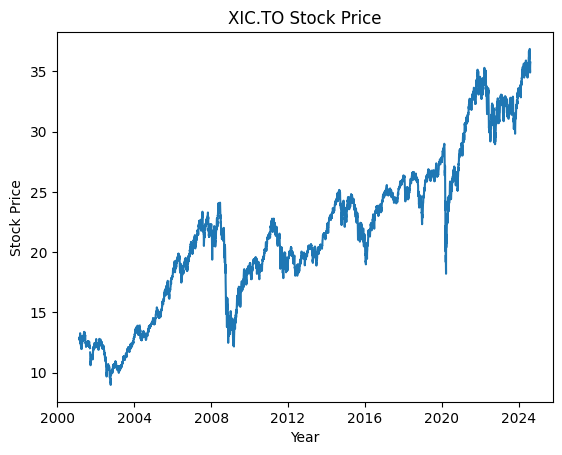

In [4]:
# Plot stock price over the years
plt.plot(df['Date'], df['Close'])
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('XIC.TO Stock Price')
plt.show()

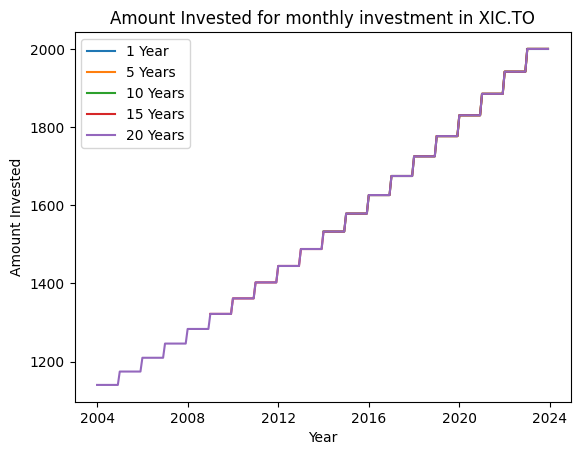

In [5]:
# Monthly amount_invested over the years
for returns in [one_year_returns, five_year_returns, ten_year_returns, fifteen_year_returns, twenty_year_returns]:
    plt.plot([x['date'] for x in returns], [x['amount_invested'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years', '15 Years', '20 Years'])
plt.xlabel('Year')
plt.ylabel('Amount Invested')
plt.title('Amount Invested for monthly investment in XIC.TO')
plt.show()

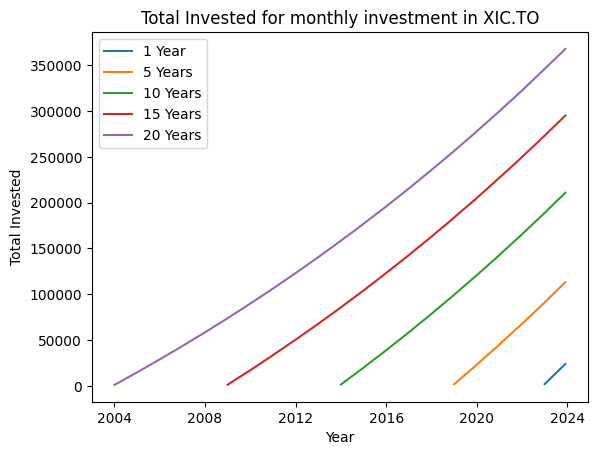

In [6]:
# Plot monthly total investment over the years
for returns in [one_year_returns, five_year_returns, ten_year_returns, fifteen_year_returns, twenty_year_returns]:
    plt.plot([x['date'] for x in returns], [x['total_invested'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years', '15 Years', '20 Years'])
plt.xlabel('Year')
plt.ylabel('Total Invested')
plt.title('Total Invested for monthly investment in XIC.TO')
plt.show()

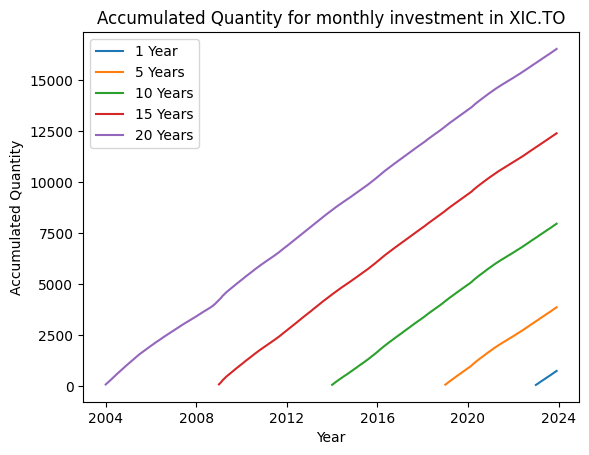

In [7]:
# Accumulated shares quantity over the years
for returns in [one_year_returns, five_year_returns, ten_year_returns, fifteen_year_returns, twenty_year_returns]:
    plt.plot([x['date'] for x in returns], [x['accumulated_quantity'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years', '15 Years', '20 Years'])
plt.xlabel('Year')
plt.ylabel('Accumulated Quantity')
plt.title('Accumulated Quantity for monthly investment in XIC.TO')
plt.show()

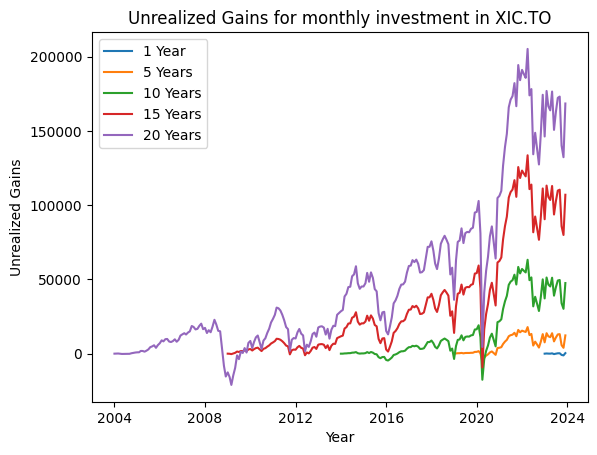

In [8]:
# Plot unrealized gains on the left y axis and total invested on the right y axis
for returns in [one_year_returns, five_year_returns, ten_year_returns, fifteen_year_returns, twenty_year_returns]:
    plt.plot([x['date'] for x in returns], [x['unrealized_gains'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years', '15 Years', '20 Years'])
plt.xlabel('Year')
plt.ylabel('Unrealized Gains')
plt.title('Unrealized Gains for monthly investment in XIC.TO')
plt.show()

In [9]:
for year, data in zip([1, 5, 10, 15, 20], [one_year_returns, five_year_returns, ten_year_returns, fifteen_year_returns,
                                           twenty_year_returns]):
    print(f"{year} Year")
    print(f"Unrealized Gains: {data[-1]['unrealized_gains']} CAD")
    print(f"Total Invested: {data[-1]['total_invested']} CAD")
    print(f"Accumulated Quantity: {data[-1]['accumulated_quantity']} units")
    print(f"Return on Investment: {round((data[-1]['unrealized_gains'] / data[-1]['total_invested']) * 100, 2)}%")

1 Year
Unrealized Gains: 359.76 CAD
Total Invested: 23995.17 CAD
Accumulated Quantity: 751.0 units
Return on Investment: 1.5%
5 Year
Unrealized Gains: 12297.08 CAD
Total Invested: 113207.02 CAD
Accumulated Quantity: 3870.0 units
Return on Investment: 10.86%
10 Year
Unrealized Gains: 47546.67 CAD
Total Invested: 210855.57 CAD
Accumulated Quantity: 7968.0 units
Return on Investment: 22.55%
15 Year
Unrealized Gains: 107016.78 CAD
Total Invested: 295082.79 CAD
Accumulated Quantity: 12399.0 units
Return on Investment: 36.27%
20 Year
Unrealized Gains: 168469.86 CAD
Total Invested: 367760.19 CAD
Accumulated Quantity: 16535.0 units
Return on Investment: 45.81%
